In [1]:
import pandas as pd
import plotly.express as px
from scipy.stats import skew


In [25]:
data = pd.read_csv("D:\\GIT HUB\\GUVI Mini Proj 4\\train_data - train_data.csv")

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [4]:
data.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [5]:
# data.duplicated().sum() - 0
data.nunique()
# data.isnull().sum() - 0

year                        1
month                       5
day                        31
order                     193
country                    46
session_id              22910
page1_main_category         4
page2_clothing_model      216
colour                     14
location                    6
model_photography           2
price                      20
price_2                     2
page                        5
dtype: int64

In [ ]:
#Data understanding - observation
#no duplicates
#no null
#page2_clothing_model -only object type - rest all int
#Encoding required for : page2_clothing_model 




In [ ]:
# will be using target encoding and frequency encoding for the page2_clothng_model column - refer one note

In [7]:
models = data['page2_clothing_model'].value_counts().reset_index(name = 'count')
models

,page2_clothing_model,count
0,B4,2824
1,A2,2389
2,A11,2247
3,P1,2134
4,B10,2011
...,...,...
211,P31,64
212,P66,42
213,P79,2
214,P22,2


In [3]:
model_en = data['page2_clothing_model'].value_counts()

In [27]:
data['model_encoded'] = data['page2_clothing_model'].map(model_en)
# data.drop(columns='page2_clothing_model',inplace= True)

In [38]:
# models['percent'] = models['count']/132379*100
# models.head()
import plotly.express as px
fig = px.bar(
    models,
    x = 'page2_clothing_model',
    y = 'count',
    title = 'model and its overall share'
)

fig.show()

In [37]:
fig = px.histogram(
    models,
    x = 'percent',
    title = 'model and its overall share'
    # kde = True
)

fig.show()

**# AI area**

In [ ]:
import google.generativeai as genai
# --- SETUP GEMINI API KEY ---
genai.configure(api_key="")
# --- FUNCTION: Ask Gemini to Extract Info ---
def query_gemini(prompt):
    model = genai.GenerativeModel('gemini-2.0-flash') #'gemini-2.0-flash' #gemini-pro
    response = model.generate_content(prompt)
    return response.text

d:\GIT HUB\GUVI Mini Proj 4\clickstream_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [ ]:
# user_prompt = f"""
#     you are data scientist who is speacilised in ecommerce domain. understand the following data set. 
#     apart from page2_clothing_model. what are all the features that need to scaled/normalised before I go for co-relation matrix and unsupervised learning.
#     also what are all the features I should consider for the skewness and kurtosis, what are the transformations I can use on them
# data set:
# {data.head(100)}
#     """
user_prompt = f"""
    you are data scientist who is speacilised in ecommerce domain. understand the following data set. 
    write me the code to create correlation matrix for the data  
    data set:
{data}
    """
# Step 3: Query Gemini and print the result
result = query_gemini(user_prompt)
print("Extracted Info:\n", result)

In [ ]:

def create_plotly_correlation_matrix(df):
    """
    Calculates the correlation matrix for a DataFrame and plots it as an
    interactive heatmap using Plotly Express.

    Args:
        df (pd.DataFrame): The input DataFrame containing numerical data.
    """
    # 1. Calculate the correlation matrix
    correlation_matrix = df.corr()

    # 2. Extract values, row/column names for the heatmap
    z = correlation_matrix.values
    x = correlation_matrix.columns
    y = correlation_matrix.index

    # 3. Create the interactive heatmap using Plotly Express
    fig = px.imshow(
        z,
        x=x,
        y=y,
        color_continuous_scale='RdBu_r', # 'RdBu_r' is good for showing positive/negative correlation
        aspect="auto", # Allows the plot to scale correctly
        title='**Correlation Matrix Heatmap**'
    )

    # 4. Optional: Add text annotations for correlation values (for better readability)
    # This loop iterates through the matrix and adds the value as text
    for i in range(len(y)):
        for j in range(len(x)):
            fig.add_annotation(
                x=x[j], y=y[i],
                text=f'{z[i, j]:.2f}', # Format to 2 decimal places
                showarrow=False,
                font=dict(color="black", size=10)
            )

    # 5. Enhance layout
    fig.update_layout(
        xaxis_title="Features",
        yaxis_title="Features",
        xaxis={'side': 'bottom'},
        # Adjusting the colorbar title and range
        coloraxis_colorbar=dict(
            title="Correlation",
            tickvals=[-1, 0, 1],
            ticktext=['-1 (Negative)', '0 (None)', '1 (Positive)'],
        ),
        # Ensure the labels don't get cut off
        margin=dict(l=100, r=100, t=100, b=100)
    )

    # 6. Display the figure
    fig.show()

# --- Example Usage ---

# Create a sample DataFrame
# np.random.seed(42)
# data = {
#     'Feature A': np.random.rand(100),
#     'Feature B': np.random.randn(100) * 5,
#     'Feature C': np.random.randn(100) * 2 + 5,
#     # Create a feature highly correlated with Feature B
#     'Feature D': 2 * (np.random.randn(100) * 5) + np.random.rand(100) * 0.5
# }
# df_sample = pd.DataFrame(data)

# Run the function with the sample data
create_plotly_correlation_matrix(data)

In [ ]:
# doubts
# what is the target column for the regression models?
# can we leave the regression if not possible to determine one?


In [ ]:
#things to finish
# scaling  --- check if the order and price column need to scaled 1st before checking for skewness and kurtosis - 
# - or 1st transformed based on the skewness and kurtosis before scaling - and is scaling required after the transformation?
# skewness and kurtosis -- identification on continuous columns
# skewness and kurtosis -- transformation 
# encoding --(one-hot and other things) if we are going to do regression and if it is needed for the classification
# hypothesis testing
----
#count of session id and day - viz

In [39]:
data['country'].value_counts()

country
29    107173
9      14465
24      3272
46      1988
44      1130
16       632
21       622
34       584
41       539
3        193
27       190
12       166
42       141
37       133
31       121
10       120
22       116
28       116
38       114
15        96
11        90
25        54
2         49
32        40
14        35
23        34
39        24
19        24
43        23
17        17
18        15
36        12
7          9
20         8
45         6
47         5
5          4
30         4
6          3
33         3
1          3
35         2
8          1
26         1
13         1
4          1
Name: count, dtype: int64

In [42]:
models_country = data['country'].value_counts().reset_index(name = 'count')
fig = px.pie(
    models_country,
    values= 'country'

)

fig.show()

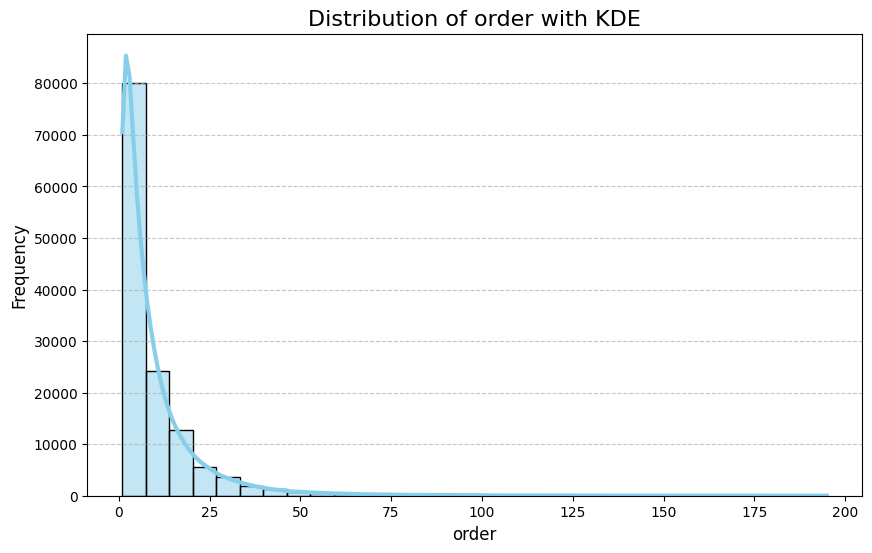

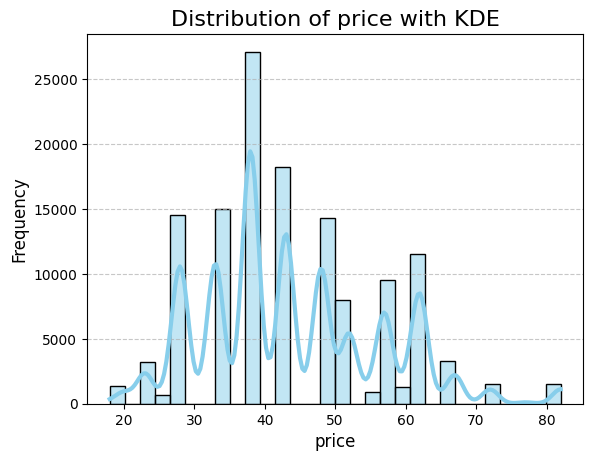

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd
# import numpy as np
cont_col = ['order', 'price']
# 2. Create the Distribution Plot using Seaborn
plt.figure(figsize=(10, 6))
for i in cont_col:
# sns.histplot is the standard function for distribution plots.
# 'kde=True' tells Seaborn to calculate and draw the KDE line.
    sns.histplot(
        data,
        x=i,
        kde=True,
        bins=30,             # Set the number of bins
        color='skyblue',     # Set the color of the bars
        line_kws={'linewidth': 3, 'color': 'darkred'} # Customize the KDE line
    )

    # 3. Customize the Plot (Matplotlib functions)
    plt.title(f'Distribution of {i} with KDE', fontsize=16)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
data['price'].value_counts().reset_index(name ='count')

In [ ]:
cont_col = ['order', 'price']
for i in cont_col:
    skewness_value = skew(data[i].values)
    if skewness_value > 1:
        #(Highly Asymmetrical) | Transformation is strongly recommended.
        print(f"The skewness of the {i} column is: {skewness_value:.4f} and it is < 1 so highly skewed(positive)")
    if skewness_value >= 0.5 and skewness_value <= 1:
        #Transformation is often beneficial, but not always critical
        print(f"The skewness of the {i} column is: {skewness_value:.4f} and it is < 0.5 so skewed")
    if skewness_value >= -0.5 and skewness_value <= 0.5:
        #n(Approximately Symmetrical) | No transformation typically needed
        print(f"The skewness of the {i} column is: {skewness_value:.4f} and it is near 0  so not skewed")
    if skewness_value <= -1 :
        #(Highly Asymmetrical) | Transformation is strongly recommended.
        print(f"The skewness of the {i} column is: {skewness_value:.4f} and it is > -1 so highly skewed(negative)")
    if skewness_value <= -0.5 and skewness_value <= -1:
        #Transformation is often beneficial, but not always critical
        print(f"The skewness of the {i} column is: {skewness_value:.4f} and it is > -0.5 so skewed")  

NameError: name 'cont_col' is not defined

In [7]:
import numpy as np
from scipy.stats import boxcox, skew
cont_col = ['order', 'price']
# --- 2. Perform Transformations ---
transform_df = data[['order','price']] 

for i in cont_col:
    # 1. Log Transformation (np.log) - Most aggressive
    transform_df[f'{i}_log'] = np.log(transform_df[i])

    # 2. Square Root Transformation (np.sqrt) - Milder
    transform_df[f'{i}_sqrt'] = np.sqrt(transform_df[i])

    # 3. Cube Root Transformation (np.cbrt or power 1/3) - Milder than Log
    transform_df[f'{i}_cbrt'] = np.cbrt(transform_df[i])

    # 4. Box-Cox Transformation - Finds the optimal power (lambda)
    # Note: boxcox() returns two things: the transformed data and the optimal lambda.
    transform_df[f'{i}_boxcox'], optimal_lambda = boxcox(transform_df[i])


# --- 3. Display Results (New Columns and Skewness) ---

    print("--- Skewness Comparison ---")
    print(f"Original {i} Skew: {skew(transform_df[i].values):.4f}")
    print(f"Log Transformed Skew: {skew(transform_df[f'{i}_log'].values):.4f}")
    print(f"Square Root Skew: {skew(transform_df[f'{i}_sqrt'].values):.4f}")
    print(f"Cube Root Skew: {skew(transform_df[f'{i}_cbrt'].values):.4f}")
    print(f"Box-Cox Transformed Skew: {skew(transform_df[f'{i}_boxcox'].values):.4f}")
    print(f"\nOptimal Lambda (Box-Cox): {optimal_lambda:.4f}")

print("\n--- Transformed Data Head ---")
transform_df.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_4672\2330752498.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform_df[f'{i}_log'] = np.log(transform_df[i])
C:\Users\Hp\AppData\Local\Temp\ipykernel_4672\2330752498.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform_df[f'{i}_sqrt'] = np.sqrt(transform_df[i])
C:\Users\Hp\AppData\Local\Temp\ipykernel_4672\2330752498.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

--- Skewness Comparison ---
Original order Skew: 4.4661
Log Transformed Skew: 0.1381
Square Root Skew: 1.6397
Cube Root Skew: 1.0375
Box-Cox Transformed Skew: 0.0140

Optimal Lambda (Box-Cox): -0.0566
--- Skewness Comparison ---
Original price Skew: 0.5241
Log Transformed Skew: -0.1257
Square Root Skew: 0.2037
Cube Root Skew: 0.0955
Box-Cox Transformed Skew: -0.0079

Optimal Lambda (Box-Cox): 0.1761

--- Transformed Data Head ---


C:\Users\Hp\AppData\Local\Temp\ipykernel_4672\2330752498.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform_df[f'{i}_boxcox'], optimal_lambda = boxcox(transform_df[i])


,order,price,order_log,order_sqrt,order_cbrt,order_boxcox,price_log,price_sqrt,price_cbrt,price_boxcox
0,21,48,3.044522,4.582576,2.758924,2.796565,3.871201,6.928203,3.634241,5.549252
1,6,57,1.791759,2.449490,1.817121,1.703870,4.043051,7.549834,3.848501,5.894209
2,2,48,0.693147,1.414214,1.259921,0.679722,3.871201,6.928203,3.634241,5.549252
3,2,43,0.693147,1.414214,1.259921,0.679722,3.761200,6.557439,3.503398,5.333863
4,16,57,2.772589,4.000000,2.519842,2.565918,4.043051,7.549834,3.848501,5.894209


In [18]:
transform_df.columns

Index(['order', 'price', 'order_log', 'order_sqrt', 'order_cbrt',
       'order_boxcox', 'price_log', 'price_sqrt', 'price_cbrt',
       'price_boxcox'],
      dtype='object')

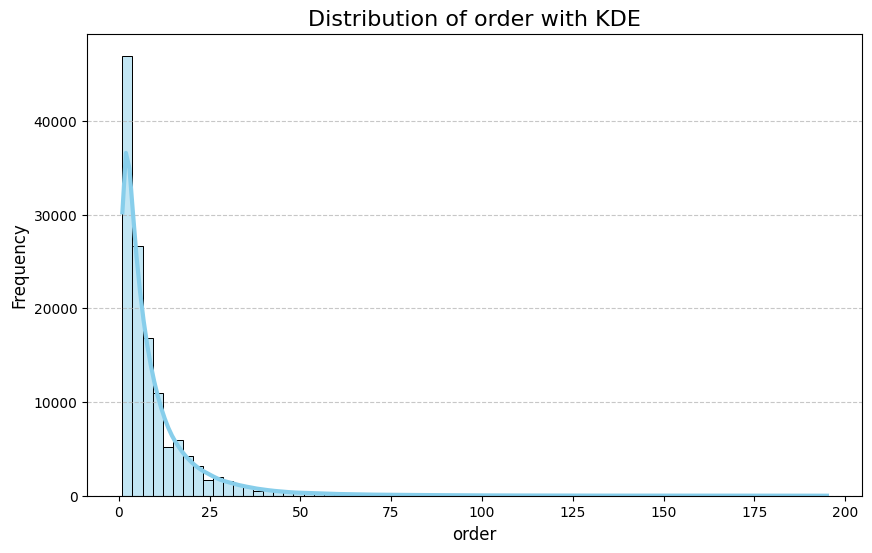

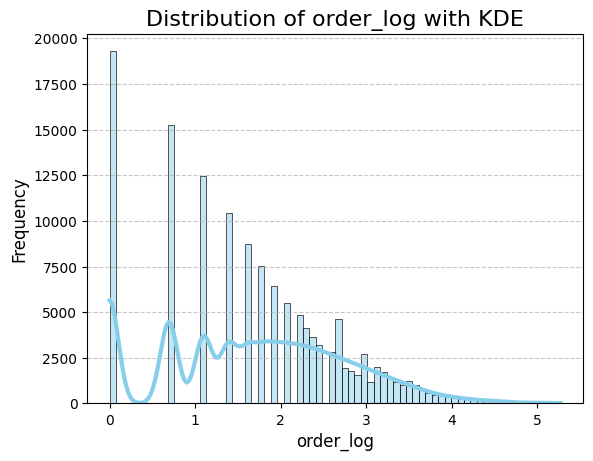

KeyboardInterrupt: 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd
# import numpy as np
cont_col = ['order','order_log', 'order_sqrt', 'order_cbrt','order_boxcox', 'price', 'price_log', 'price_sqrt', 'price_cbrt','price_boxcox']
# 2. Create the Distribution Plot using Seaborn
plt.figure(figsize=(10, 6))
for i in cont_col:
# sns.histplot is the standard function for distribution plots.
# 'kde=True' tells Seaborn to calculate and draw the KDE line.
    sns.histplot(
        transform_df,
        x=i,
        kde=True,
        bins=70,             # Set the number of bins
        color='skyblue',     # Set the color of the bars
        line_kws={'linewidth': 3, 'color': 'darkred'} # Customize the KDE line
    )

    # 3. Customize the Plot (Matplotlib functions)
    plt.title(f'Distribution of {i} with KDE', fontsize=16)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
#where k=0 is a perfectly normal distribution:|no transformation is required
#|k| < 1.0 (e.g., -0.99 to 0.99) | Tolerable/Acceptable. Close to Mesokurtic. | Use data as is; no correction needed. 
# 1.0 < |k| < 2.0 | Moderate. (Slightly Leptokurtic/Platykurtic) | Note the deviation; usually doesn't require specific transformation. 
#|k| < 2.0 (e.g., 2.01 or -2.01) | Extreme. (Significantly Leptokurtic/Platykurtic) | High Concern. Carefully check for extreme outliers and model instability, especially in parametric methods. |

In [25]:
from scipy.stats import kurtosis
for i in cont_col:
    original_kurtosis = kurtosis(transform_df[i].values)

    print(f"Excess Kurtosis ({i}): {original_kurtosis:.4f}")


Excess Kurtosis (order): 32.4538
Excess Kurtosis (order_log): -0.5984
Excess Kurtosis (order_sqrt): 4.3159
Excess Kurtosis (order_cbrt): 1.4914
Excess Kurtosis (order_boxcox): -0.7009
Excess Kurtosis (price): -0.1443
Excess Kurtosis (price_log): -0.4249
Excess Kurtosis (price_sqrt): -0.4506
Excess Kurtosis (price_cbrt): -0.4795
Excess Kurtosis (price_boxcox): -0.4728


In [28]:
data['price_transformed'], optimal_lambda = boxcox(data['price'])
data['order_transformed'] = np.log(data['order'])

In [31]:

def create_plotly_correlation_matrix(df):
    """
    Calculates the correlation matrix for a DataFrame and plots it as an
    interactive heatmap using Plotly Express.

    Args:
        df (pd.DataFrame): The input DataFrame containing numerical data.
    """
    # 1. Calculate the correlation matrix
    correlation_matrix = df.corr()

    # 2. Extract values, row/column names for the heatmap
    z = correlation_matrix.values
    x = correlation_matrix.columns
    y = correlation_matrix.index

    # 3. Create the interactive heatmap using Plotly Express
    fig = px.imshow(
        z,
        x=x,
        y=y,
        color_continuous_scale='RdBu_r', # 'RdBu_r' is good for showing positive/negative correlation
        aspect="auto", # Allows the plot to scale correctly
        title='**Correlation Matrix Heatmap**'
    )

    # 4. Optional: Add text annotations for correlation values (for better readability)
    # This loop iterates through the matrix and adds the value as text
    for i in range(len(y)):
        for j in range(len(x)):
            fig.add_annotation(
                x=x[j], y=y[i],
                text=f'{z[i, j]:.2f}', # Format to 2 decimal places
                showarrow=False,
                font=dict(color="black", size=10)
            )

    # 5. Enhance layout
    fig.update_layout(
        xaxis_title="Features",
        yaxis_title="Features",
        xaxis={'side': 'bottom'},
        # Adjusting the colorbar title and range
        coloraxis_colorbar=dict(
            title="Correlation",
            tickvals=[-1, 0, 1],
            ticktext=['-1 (Negative)', '0 (None)', '1 (Positive)'],
        ),
        # Ensure the labels don't get cut off
        margin=dict(l=100, r=100, t=100, b=100)
    )

    # 6. Display the figure
    fig.show()

# --- Example Usage ---

# Create a sample DataFrame
# np.random.seed(42)
# data = {
#     'Feature A': np.random.rand(100),
#     'Feature B': np.random.randn(100) * 5,
#     'Feature C': np.random.randn(100) * 2 + 5,
#     # Create a feature highly correlated with Feature B
#     'Feature D': 2 * (np.random.randn(100) * 5) + np.random.rand(100) * 0.5
# }
# df_sample = pd.DataFrame(data)

# Run the function with the sample data
create_plotly_correlation_matrix(data)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler

# Extract the features into a NumPy array
X_to_scale = df[scaling_columns].values 

# --- 2. Initialize and Fit StandardScaler ---

# StandardScaler scales data to have mean=0 and standard deviation=1.
scaler = StandardScaler()

# Fit the scaler to your data and transform it in one step
X_scaled = scaler.fit_transform(X_to_scale)

# --- 3. Update the DataFrame with Scaled Values ---

# Create new column names for clarity
scaled_column_names = [col + '_scaled' for col in scaling_columns]

# Convert the scaled array back into a DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=scaled_column_names)

# Merge the new scaled columns back into the original DataFrame
df = pd.concat([df.reset_index(drop=True), df_scaled], axis=1)

# --- 4. Verification ---
print("--- Verification of Scaling (Mean & Std Dev should be near 0 and 1) ---")
print(df[scaled_column_names].describe().loc[['mean', 'std']])
print("\n--- Final DataFrame Head with Scaled Features ---")
print(df.head())

In [ ]:
# next set of doubts:-  
# pipeline creation - where and how to do it? how do i incroporate it in the project!
# How do I incorporate ML flow here?
# should I use the train data set provided to train my model by spliting it as train and test set  ? or use the train data set to train and test to test the model trained?



In [29]:
data.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page', 'model_encoded',
       'price_transformed', 'order_transformed'],
      dtype='object')

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency, f_oneway
from sklearn.feature_selection import mutual_info_classif, f_classif

# --- 1. Setup: Create a Sample DataFrame ---
# Target_Cat: Classification (e.g., Default: 0=No, 1=Yes)
# Target_Cont: Regression (e.g., Price)
# Feature_Cont: Annual Income
# Feature_Cat: Region (A, B, C)
# data = {
#     'Target_Cat': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
#     'Target_Cont': [100, 200, 150, 300, 120, 250, 170, 320, 110, 280, 160, 310],
#     'Income': [50, 75, 55, 80, 52, 78, 58, 85, 51, 82, 57, 84], # Continuous Feature
#     'Region': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'A', 'C', 'B', 'C'], # Categorical Feature (Low Cardinality)
#     'Age': [25, 45, 30, 50, 28, 48, 35, 55, 27, 47, 32, 52] # Continuous Feature
# }
# df = pd.DataFrame(data)
alpha = 0.05 # Significance Level

print("--- Initial Data ---")
print(df.head())
print("-" * 30)

# ==========================================================
# SCENARIO 1: CONTINUOUS vs. CONTINUOUS
# Test: Pearson's Correlation
# Example: Income (Cont. Feature) vs. Target_Cont (Cont. Target)
# Goal: Check for linear relevance in a Regression problem
# H0(null hypothesis) =  Income is not significantly linearly related to Target_Cont
# H1(Alternate hypothesis) = Income is significantly linearly related to Target_Cont
# ==========================================================
print("1. CONTINUOUS vs. CONTINUOUS (Income vs. Target_Cont)")
correlation, p_value = pearsonr(df['Income'], df['Target_Cont'])

print(f"   Pearson's r: {correlation:.3f}")
print(f"   P-Value: {p_value:.5f}")

if p_value < alpha:
    print("   ✅ **Conclusion: Reject Null Hypothesis.** Income is significantly linearly related to Target_Cont.")
else:
    print("   ❌ Conclusion: Fail to Reject Null Hypothesis. Income is not significantly linearly related to Target_Cont.")
print("-" * 30)

# ==========================================================
# SCENARIO 2: CONTINUOUS vs. CATEGORICAL
# Test: ANOVA (Analysis of Variance) - General case for F-Test
# Example: Income (Cont. Feature) vs. Target_Cat (Cat. Target)
# Goal: Check if mean Income is different across Default groups (0 vs 1)
# ==========================================================
print("2. CONTINUOUS vs. CATEGORICAL (Income vs. Target_Cat)")

# Separate the continuous data into groups based on the categorical target
group0 = df[df['Target_Cat'] == 0]['Income']
group1 = df[df['Target_Cat'] == 1]['Income']

# The f_oneway test performs ANOVA (for 2+ groups)
f_statistic, p_value = f_oneway(group0, group1)

print(f"   F-Statistic: {f_statistic:.3f}")
print(f"   P-Value: {p_value:.5f}")

if p_value < alpha:
    print("   ✅ **Conclusion: Reject Null Hypothesis.** Mean Income is significantly different between Default groups.")
else:
    print("   ❌ Conclusion: Fail to Reject Null Hypothesis. Mean Income is NOT significantly different between Default groups.")
print("-" * 30)


# ==========================================================
# SCENARIO 3: CATEGORICAL vs. CATEGORICAL
# Test: Chi-Square Test
# Example: Region (Cat. Feature) vs. Target_Cat (Cat. Target)
# Goal: Check if the distribution of Target_Cat is dependent on Region
# ==========================================================
print("3. CATEGORICAL vs. CATEGORICAL (Region vs. Target_Cat)")

# Create a Contingency Table (crosstab)
contingency_table = pd.crosstab(df['Region'], df['Target_Cat'])

# The chi2_contingency test returns: chi2 stat, p-value, df, expected freqs
chi2_stat, p_value, degrees_of_freedom, expected_freqs = chi2_contingency(contingency_table)

print("   Contingency Table:")
print(contingency_table)
print(f"   Chi-Square Stat: {chi2_stat:.3f}")
print(f"   P-Value: {p_value:.5f}")

if p_value < alpha:
    print("   ✅ **Conclusion: Reject Null Hypothesis.** Region and Target_Cat are dependent (relevant).")
else:
    print("   ❌ Conclusion: Fail to Reject Null Hypothesis. Region and Target_Cat are independent (not relevant).")
print("-" * 30)


# ==========================================================
# BONUS: Non-Linear Relevance Check (Mutual Information)
# Used for: Continuous/Categorical vs. Categorical Target (for non-linear check)
# Example: Age (Cont. Feature) vs. Target_Cat
# ==========================================================
print("4. BONUS: Mutual Information (Non-Linear Relevance)")

# MI is calculated using a utility from sklearn.feature_selection
# Note: For Continuous feature, it discretizes the data for MI calculation.
# MI score is NOT a hypothesis test (no p-value), but a measure of dependency.
mi_score = mutual_info_classif(df[['Age']], df['Target_Cat'], random_state=42)[0]

print(f"   Mutual Information Score (Age vs. Target_Cat): {mi_score:.3f}")
print("   Interpretation: Higher score indicates higher dependency (relevance).")

In [12]:
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency, f_oneway
from sklearn.feature_selection import mutual_info_classif, f_classif


In [30]:
cat_col = ['month', 'day', 'country', 'session_id','page2_clothing_model',
           'page1_main_category', 'colour', 'location', 'model_photography', 'page', 'model_encoded']
cont_col = ['order','price','price_transformed','order_transformed']
target_col = ['price_2']
relevant = []

In [20]:
alpha = 0.05 # Significance Level

# ==========================================================
# SCENARIO 1: CONTINUOUS vs. CONTINUOUS
# Test: Pearson's Correlation
# Example: Income (Cont. Feature) vs. Target_Cont (Cont. Target)
# Goal: Check for linear relevance in a Regression problem
# H0(null hypothesis) =  Income is not significantly linearly related to Target_Cont
# H1(Alternate hypothesis) = Income is significantly linearly related to Target_Cont
# ==========================================================
print("1. CONTINUOUS vs. CONTINUOUS (Income vs. Target_Cont)")
correlation, p_value = pearsonr(df['Income'], df['Target_Cont'])

print(f"   Pearson's r: {correlation:.3f}")
print(f"   P-Value: {p_value:.5f}")

if p_value < alpha:
    print("   ✅ **Conclusion: Reject Null Hypothesis.** Income is significantly linearly related to Target_Cont.")
    relevant.append(i)
else:
    print("   ❌ Conclusion: Fail to Reject Null Hypothesis. Income is not significantly linearly related to Target_Cont.")
print("-" * 30)



1. CONTINUOUS vs. CONTINUOUS (Income vs. Target_Cont)


NameError: name 'df' is not defined

In [31]:
# ==========================================================
# SCENARIO 2: CONTINUOUS vs. CATEGORICAL
# Test: ANOVA (Analysis of Variance) - General case for F-Test
# Example: Income (Cont. Feature) vs. Target_Cat (Cat. Target)
# Goal: Check if mean Income is different across Default groups (0 vs 1)
# ==========================================================
alpha = 0.05 # Significance Level

print("2. CONTINUOUS vs. CATEGORICAL (Income vs. Target_Cat)")

# Separate the continuous data into groups based on the categorical target
# group0 = df[df['Target_Cat'] == 0]['Income']
# group1 = df[df['Target_Cat'] == 1]['Income']

for i in cont_col:
    group1 = data[data['price_2'] == 1][i]
    group2 = data[data['price_2'] == 2][i]
    # The f_oneway test performs ANOVA (for 2+ groups)
    f_statistic, p_value = f_oneway(group1, group2)
    print(f"   F-Statistic: {f_statistic:.3f}")
    print(f"   P-Value: {p_value:.5f}")

    if p_value < alpha:
        print(f"   ✅ **Conclusion: Reject Null Hypothesis.** Mean {i} is significantly different between Price_2 groups.")
        relevant.append(i)
    else:
        print(f"   ❌ Conclusion: Fail to Reject Null Hypothesis. Mean {i} is NOT significantly different between Default groups.")
    print("-" * 30)
    






2. CONTINUOUS vs. CATEGORICAL (Income vs. Target_Cat)
   F-Statistic: 0.075
   P-Value: 0.78451
   ❌ Conclusion: Fail to Reject Null Hypothesis. Mean order is NOT significantly different between Default groups.
------------------------------
   F-Statistic: 163260.505
   P-Value: 0.00000
   ✅ **Conclusion: Reject Null Hypothesis.** Mean price is significantly different between Price_2 groups.
------------------------------
   F-Statistic: 173814.475
   P-Value: 0.00000
   ✅ **Conclusion: Reject Null Hypothesis.** Mean price_transformed is significantly different between Price_2 groups.
------------------------------
   F-Statistic: 2.322
   P-Value: 0.12755
   ❌ Conclusion: Fail to Reject Null Hypothesis. Mean order_transformed is NOT significantly different between Default groups.
------------------------------


In [32]:
# ==========================================================
# SCENARIO 3: CATEGORICAL vs. CATEGORICAL
# Test: Chi-Square Test
# Example: Region (Cat. Feature) vs. Target_Cat (Cat. Target)
# Goal: Check if the distribution of Target_Cat is dependent on Region
# ==========================================================

print("3. CATEGORICAL vs. CATEGORICAL (Region vs. Target_Cat)")

alpha = 0.05 # Significance Level
# Create a Contingency Table (crosstab)
# contingency_table = pd.crosstab(df['Region'], df['Target_Cat'])

for i in cat_col:
    contingency_table = pd.crosstab(data[i], data['price_2'])

    # The chi2_contingency test returns: chi2 stat, p-value, df, expected freqs
    chi2_stat, p_value, degrees_of_freedom, expected_freqs = chi2_contingency(contingency_table)

    print("   Contingency Table:")
    print(contingency_table)
    print(f"   Chi-Square Stat: {chi2_stat:.3f}")
    print(f"   P-Value: {p_value:.5f}")

    if p_value < alpha:
        print(f"   ✅ **Conclusion: Reject Null Hypothesis.** {i} and Price_2 are dependent (relevant).")
        relevant.append(i)
    else:
        print(f"   ❌ Conclusion: Fail to Reject Null Hypothesis. {i} and Price_2 are independent (not relevant).")
    print("-" * 30)

3. CATEGORICAL vs. CATEGORICAL (Region vs. Target_Cat)
   Contingency Table:
price_2      1      2
month                
4        19827  18837
5        14281  14291
6        12933  12861
7        14555  13477
8         6118   5199
   Chi-Square Stat: 71.449
   P-Value: 0.00000
   ✅ **Conclusion: Reject Null Hypothesis.** month and Price_2 are dependent (relevant).
------------------------------
   Contingency Table:
price_2     1     2
day                
1        2936  2709
2        3006  2812
3        2465  2393
4        2678  2486
5        2597  2366
6        2557  2426
7        2557  2367
8        2733  2601
9        2482  2333
10       2513  2463
11       2596  2527
12       2553  2429
13       1730  1748
14       2218  2102
15       1852  1867
16       2322  2239
17       2053  1994
18       1955  1859
19       1914  1876
20       1878  1771
21       2052  1948
22       2028  1816
23       2092  2036
24       2003  2033
25       1915  1898
26       1697  1592
27       1739  1615


In [33]:
relevant

['price',
 'price_transformed',
 'month',
 'country',
 'session_id',
 'page2_clothing_model',
 'page1_main_category',
 'colour',
 'location',
 'model_photography',
 'page',
 'model_encoded']

In [ ]:
# forecast idea: 
# sum the sale for each day
# calculate how many customers (sessions opened per day)
# plot the graph of expected session and sales volume for next 7 days 
# calculate the demand for the clothing-model-item by predicting the amount(volume) it is going to be sold in next 7 days